In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sn

dataset = pd.read_csv("Flavia_features.csv")

maindir = r'C:\Users\Shubham Mavaskar\Desktop\My Project'
ds_path = "Leaves"
img_files = os.listdir(ds_path)

breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)
        
X = dataset.iloc[:, 1:]
y = np.array(target_list)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def augment_data(X, y, factor=2):
    augmented_X = []
    augmented_y = []
    
    for _ in range(factor):
        for i in range(len(X)):
            augmented_X.append(X[i] + np.random.normal(0, 0.01, size=X[i].shape))  
            augmented_y.append(y[i])
    
    return np.vstack(augmented_X), np.array(augmented_y)

X_train, y_train = augment_data(X_train, y_train)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix: ",cm)
print(classification_report(y_test, y_pred))



Accuracy: 0.8621291448516579
Confusion matrix:  [[16  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  1 13  0]
 [ 0  0  0 ...  0  0 19]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.93      0.72      0.81        18
           2       1.00      0.86      0.93        22
           3       0.96      0.93      0.94        27
           4       1.00      1.00      1.00        24
           5       0.94      1.00      0.97        16
           6       0.89      0.85      0.87        20
           7       0.91      0.71      0.80        14
           8       0.60      0.75      0.67        12
           9       0.93      0.93      0.93        15
          10       0.70      0.78      0.74        18
          11       0.79      0.83      0.81        18
          12       0.73      0.61      0.67        18
          13       0.90      0.79      

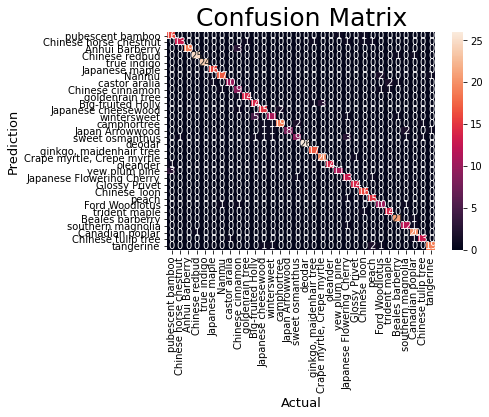

In [2]:
import matplotlib.pyplot as plt

sn.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'],
            yticklabels=['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=25)
plt.show()
 

In [3]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8708551483420593


In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [5]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [6]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [7]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Model Performance')
#     print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy = 0.87%.


<ipython-input-7-8fb9b20c2c9c>:4: RuntimeWarning: divide by zero encountered in divide
  mape = 100 * np.mean(errors / y_test)
<ipython-input-7-8fb9b20c2c9c>:4: RuntimeWarning: invalid value encountered in divide
  mape = 100 * np.mean(errors / y_test)


In [8]:
# import numpy as np
# import os
# import cv2
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score, classification_report
# import pandas as pd

# # Load and preprocess the leaf image dataset
# dataset = pd.read_csv("Flavia_features.csv")
# maindir = r'C:\Users\Shubham Mavaskar\Desktop\My Project'
# ds_path = "Leaves"
# img_files = os.listdir(ds_path)

# breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

# target_list = []
# for file in img_files:
#     target_num = int(file.split(".")[0])
#     flag = 0
#     i = 0 
#     for i in range(0,len(breakpoints),2):
#         if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
#             flag = 1
#             break
#     if(flag==1):
#         target = int((i/2))
#         target_list.append(target)

# y = np.array(target_list)
# y
# X = dataset.iloc[:,1:]


# # image_dir = "Leaves"  # Update with your dataset directory
# # images = []
# # labels = []

# # for root, dirs, files in os.walk(image_dir):
# #     for file in files:
# #         if file.endswith(".jpg"):  # Adjust based on your image format
# #             image_path = os.path.join(root, file)
# #             label = os.path.basename(root)
# #             labels.append(label)
# #             image = cv2.imread(image_path)
# #             image = cv2.resize(image, (224, 224))  # Resize images to a consistent size
# #             images.append(image)

# X = np.array(images)
# y = np.array(labels)

# # Encode labels
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# y_one_hot = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=142)

# # Build a CNN model
# model = keras.Sequential([
#     keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(len(class_names), activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32)

# # Evaluate the model
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_test_classes = np.argmax(y_test, axis=1)

# accuracy = accuracy_score(y_test_classes, y_pred_classes)
# print("Accuracy:", accuracy)
# print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))


In [9]:
# import os
# import cv2
# import numpy as np

# data_dir = "Leaves"  # Update with your dataset directory
# classes = os.listdir(data_dir)

# images = []
# labels = []

# for class_name in classes:
#     class_dir = os.path.join(data_dir, class_name)
    
#     if os.path.isdir(class_dir):  # Check if it's a directory
#         for image_file in os.listdir(class_dir):
#             image_path = os.path.join(class_dir, image_file)
#             image = cv2.imread(image_path)
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure RGB format
#             image = cv2.resize(image, (224, 224))  # Resize to a common size (adjust as needed)
#             images.append(image)
#             labels.append(class_name)
            

# X = np.array(images)
# y = np.array(labels)


In [10]:
# import os
# import cv2
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from sklearn.model_selection import train_test_split

# data_dir = "Leaves"
# class_names = os.listdir(data_dir)

# images = []
# labels = []

# for root, dirs, files in os.walk(data_dir):
#     for file in files:
#         if file.endswith(".jpg"):  # Adjust based on your image format
#             image_path = os.path.join(root, file)
#             label = os.path.basename(root)
#             labels.append(label)
#             image = cv2.imread(image_path)
#             image = cv2.resize(image, (224, 224))  # Resize images to a consistent size
#             images.append(image)


# X = np.array(images)
# y = np.array(labels)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Define the CNN model
# model = keras.Sequential([
#     keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(len(class_names), activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32)

# # Evaluate the model
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print("Test accuracy:", test_acc)
